In [1]:
!pip install visualkeras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import visualkeras
from PIL import ImageFont


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 37.0 MB/s eta 0:00:00


### **Do not forget to connect to GPU runtime before training**

In [2]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.cifar10.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.3)

170498071/170498071 [==============================] - 13s 0us/step


In [3]:
X_train.shape

(35000, 32, 32, 3)

In [4]:
# Normalizing the values between -1 and 1

X_train  = X_train/255
X_test = X_test/255

In [5]:
# Create an ImageDataGenerator object with given augmentation settings(just an instance)

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,      # Random rotation within the range of [-20, 20] degrees
    width_shift_range=0.1,  # Random horizontal shift within the range of [-0.1, 0.1] of the total width
    height_shift_range=0.1, # Random vertical shift within the range of [-0.1, 0.1] of the total height
    shear_range=0.2,        # Random shearing transformations within the range of [-0.2, 0.2]
    zoom_range=0.2,         # Random zoom within the range of [0.8, 1.2]
    horizontal_flip=True,   # Randomly flip inputs horizontally
    fill_mode='nearest' ,    # Fill any newly created pixels with the nearest available pixel value
    validation_split=0.2  # Split 20% of the data for validation
)

# Apply data augmentation to the training data
augmented_images = datagen.flow(X_train, Y_train)

# creating the validation data
validation_data = datagen.flow(X_train, Y_train, subset='validation')

In [6]:
#print(np.unique(Y_train))

## **`This is an Open assignment with minimum instructions`**
You are allowed to search all over the web--> find any articles or implement them--> try your experiments

> **---> create the model**\
**---> tune the hyperparameters like learning_rate, filter/kernel size**\
**---> optimize the result**


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


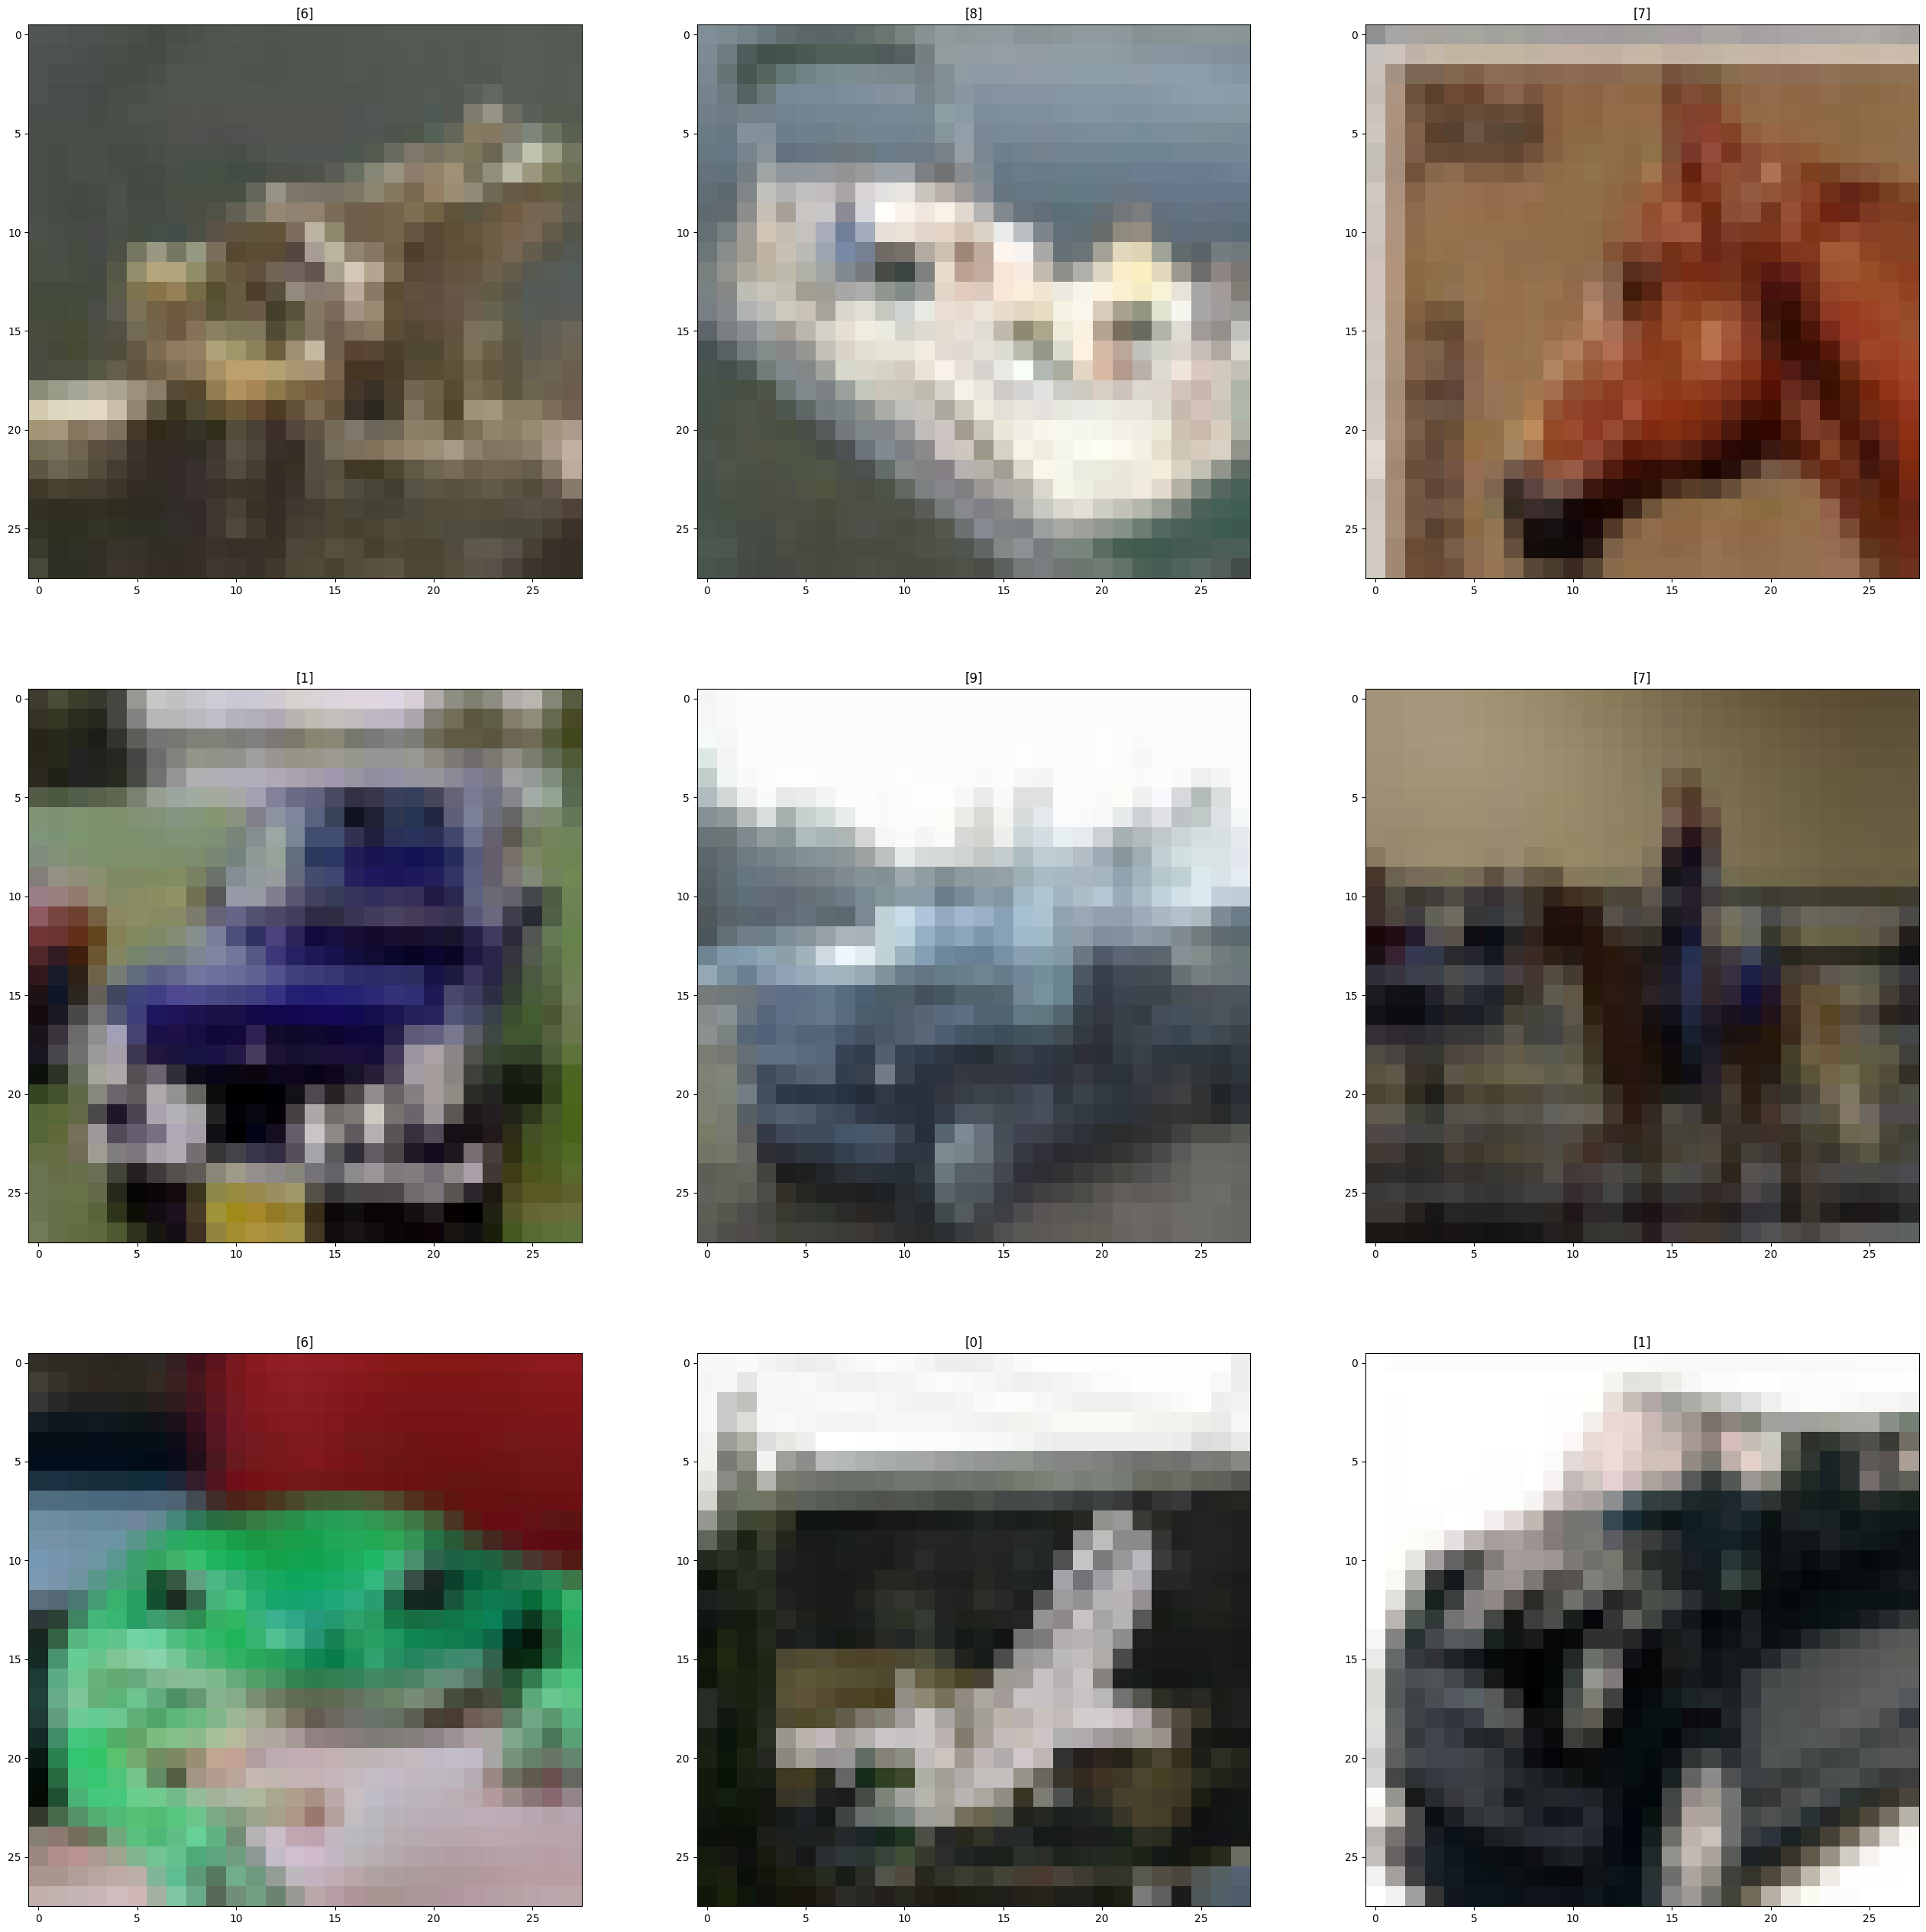

In [7]:
"""
You have got some experience form last assignment '
Use that experience this time
"""
import random
figure = plt.figure(figsize=(32,32)) #customisation
for i in range(9):
  index = random.randint(0,len(X_train)-1) # showing the index_th image
  plt.subplot(3,3,i+1)
  #edit1__plot_image_here_
  img = X_train[index,0:28,0:28]
  plt.imshow(img)
  #edit2__add_label_here_
  plt.title(Y_train[index])

In [8]:
#@title **IMPORTANT ANNOUNCEMENT**
"""
Now with this much freedom, you can do anything
So make sure you understand what you do and after the end of this assignment
 you will have explain all the code you tried in a viva exam
 this will be the mid term evaluation.
"""

'\nNow with this much freedom, you can do anything\nSo make sure you understand what you do and after the end of this assignment\n you will have explain all the code you tried in a viva exam\n this will be the mid term evaluation.\n'

## **YOUR EFFORTS WILL COUNT MORE THE RESULTS YOU GET**
> **So make sure all the time you spent on this notebook should be visible from the notebook**

In [9]:
"""
Question: What is Batch Normalization? Why is it used for? How does it fix the
problem it is used for? [ Answer in atleast 300 words]
<cite your sources>

Answer: Batch-normalisation is an algorithmic method which makes training our neural network faster and more stable. The input from prior layers can change after a weightage update.
        This would make our model slow and make learning inefficient (a large number of epochs needed).

        Internal Covariate Shift (ICS) refers to the change in distribution of layer input because of undates in previouse layers. It is widely accepted that batch normalisation is
        there to fix ICS but rescent research paper prove that this is not a concrete proof of how batch normalisation makes our model more efficient. They say we still do not understand
        the link between ICS and training efficiency. Each layer of our model's architecture is solving a risk minimizatiion problem if there is an upadate in previous input layer then
        the whole problem changes. This phenomenon is the core intuition of Internal covariate Shift. Recent article show that relation between ICS and optimization unclear. Aside from
        reducing ICS there is also smoothening effect of Batch normalisation.

        It reparametrizes the underlying optimization problem to make its landscape significantly more smooth. So now our loss changes at a smaller rate and magnitude of gradients are
        are smaller too. adding BN layer allows to use higher learning rate without losing our minima.








"""

'\nQuestion: What is Batch Normalization? Why is it used for? How does it fix the \nproblem it is used for? [ Answer in atleast 300 words]\n<cite your sources>\n\nAnswer: Batch-normalisation is an algorithmic method which makes training our neural network faster and more stable. The input from prior layers can change after a weightage update.\n        This would make our model slow and make learning inefficient (a large number of epochs needed). \n\n        Internal Covariate Shift (ICS) refers to the change in distribution of layer input because of undates in previouse layers. It is widely accepted that batch normalisation is\n        there to fix ICS but rescent research paper prove that this is not a concrete proof of how batch normalisation makes our model more efficient. They say we still do not understand\n        the link between ICS and training efficiency. \n\n\n\n'

In [10]:
"""
Tutorial: https://www.tensorflow.org/tutorials/images/classification

Above tutorial does exactly the same job
But I will zero marks for exact same model used in the tutorial

You need experiment with different layers and all those
experiments should be visible by your notebooks
"""

'\nTutorial: https://www.tensorflow.org/tutorials/images/classification\n\nAbove tutorial does exactly the same job\nBut I will zero marks for exact same model used in the tutorial\n\nYou need experiment with different layers and all those\nexperiments should be visible by your notebooks\n'

In [11]:
from keras import layers
# model initialization
model = tf.keras.Sequential()

# Intermediate layers
model.add(tf.keras.layers.Conv2D(16,(5,5),padding='same',activation = 'relu', input_shape=(32,32,3)))
model.add(tf.keras.layers.Conv2D(16,(4,4),padding='same',activation='relu',))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(32,(5,5),padding='same',activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,(5,5),padding='same',activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
# final layer
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [12]:
model.build((35000,32,32,3))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        1216      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        4112      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          5

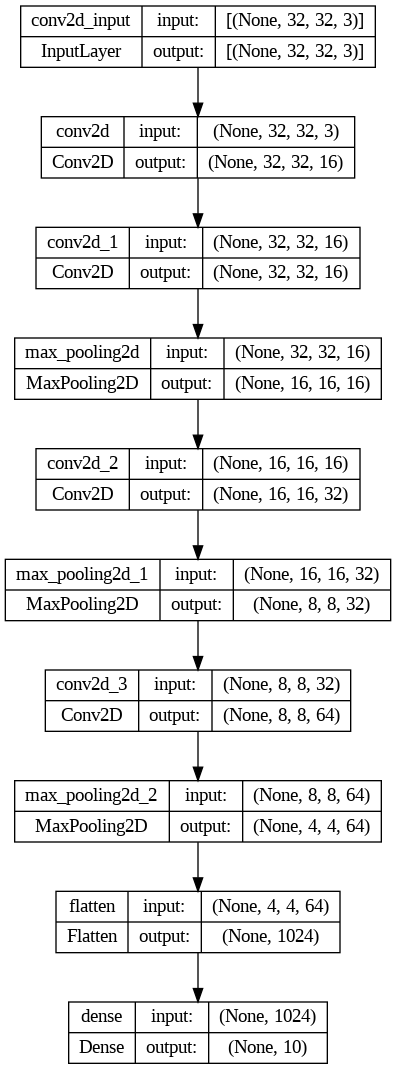

In [14]:
#@title Visualization

# just run this cell as it is
tf.keras.utils.plot_model(model, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

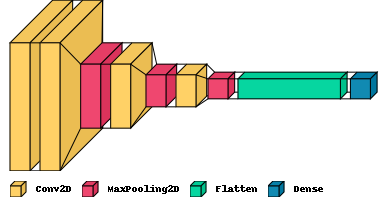

In [15]:
# just run this cell as it is
visualkeras.layered_view(model, legend=True)

In [16]:
"""
In the last part of the assignment
try experimenting with learning rate.
May be decreasing the lr might had help?
"""

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [17]:
# This is another way of dealing with the generated data
# both X_train and Y_train are inside the augmented image

history = model.fit(augmented_images, epochs=10, validation_data = validation_data)
#history = model.fit(X_train, Y_train, epochs = 10, validation_data = validation_data)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1094/1094 [==============================] - 43s 26ms/step - loss: 1.6929 - accuracy: 0.1056 - val_loss: 1.4514 - val_accuracy: 0.1126
Epoch 2/10
1094/1094 [==============================] - 27s 25ms/step - loss: 1.3592 - accuracy: 0.0986 - val_loss: 1.2392 - val_accuracy: 0.0843
Epoch 3/10
1094/1094 [==============================] - 26s 24ms/step - loss: 1.1976 - accuracy: 0.0985 - val_loss: 1.1342 - val_accuracy: 0.0989
Epoch 4/10
1094/1094 [==============================] - 37s 34ms/step - loss: 1.1044 - accuracy: 0.0997 - val_loss: 1.0388 - val_accuracy: 0.1270
Epoch 5/10
1094/1094 [==============================] - 28s 26ms/step - loss: 1.0411 - accuracy: 0.0986 - val_loss: 1.0381 - val_accuracy: 0.0920
Epoch 6/10
1094/1094 [==============================] - 27s 25ms/step - loss: 1.0032 - accuracy: 0.1011 - val_loss: 0.9604 - val_accuracy: 0.1094
Epoch 7/10
1094/1094 [==============================] - 31s 28ms/step - loss: 0.9617 - accuracy: 0.1005 - val_loss: 0.9595 - val_accura

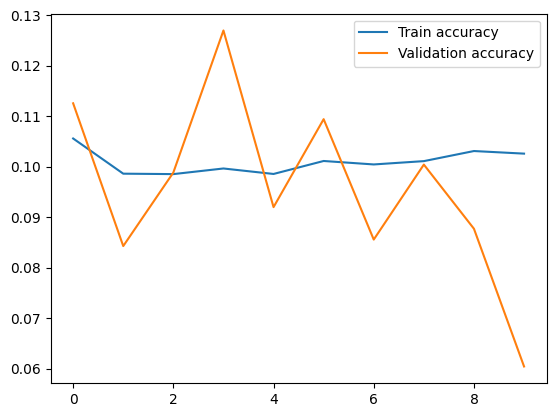

In [18]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [19]:
model.evaluate(X_test,Y_test)

469/469 [==============================] - 2s 4ms/step - loss: 0.9040 - accuracy: 0.0623


[0.903980016708374, 0.06226666644215584]

## **TRY DIFFERENT MODELS AND COMPARE THE RESULTS**

In [50]:
cnn_model = tf.keras.Sequential()

cnn_model.add(tf.keras.layers.Conv2D(16,(5,5),padding='same',activation = 'relu', input_shape=(32,32,3)))
cnn_model.add(tf.keras.layers.Conv2D(16,(1,2),padding='valid',activation='relu'))
cnn_model.add(tf.keras.layers.Conv2D(16,(2,1),padding='valid',activation='relu'))
cnn_model.add(tf.keras.layers.Conv2D(16,(5,5),padding='same',activation='relu'))
cnn_model.add(tf.keras.layers.BatchNormalization())
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))
cnn_model.add(tf.keras.layers.Conv2D(32,(3,3),padding='same',activation = 'relu'))
cnn_model.add(tf.keras.layers.BatchNormalization())
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))
cnn_model.add(tf.keras.layers.Conv2D(64,(3,3),padding='same',activation = 'relu'))
cnn_model.add(tf.keras.layers.BatchNormalization())
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

cnn_model.add(tf.keras.layers.Flatten())
cnn_model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [51]:
model.build((35000,32,32,3))

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        1216      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        4112      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          5

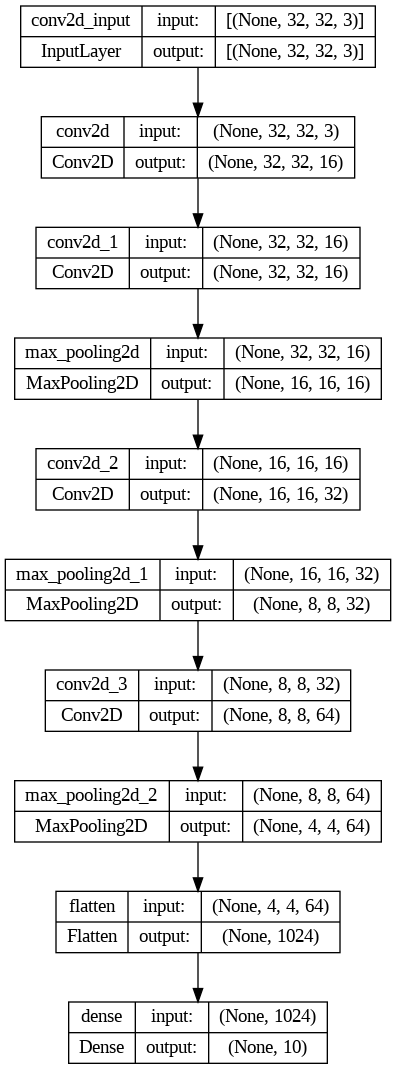

In [53]:
tf.keras.utils.plot_model(model, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

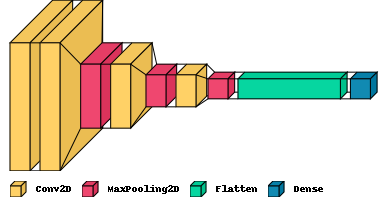

In [54]:
visualkeras.layered_view(model, legend=True)

In [55]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [59]:
history = model.fit(augmented_images, epochs=10, validation_data = validation_data)

Epoch 1/10
  93/1094 [=>............................] - ETA: 19s - loss: 0.6784 - accuracy: 0.1055

KeyboardInterrupt: ignored

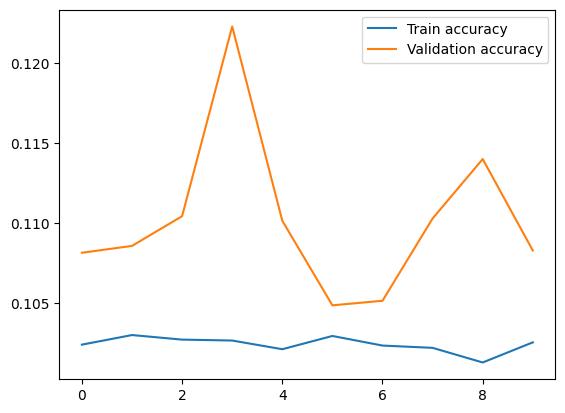

In [60]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [61]:
model.evaluate(X_test,Y_test)

469/469 [==============================] - 2s 3ms/step - loss: 0.6673 - accuracy: 0.1003


[0.667255163192749, 0.1003333330154419]